### `Project 5:  Credit Card Customer Segmentation `

- AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### `Objective:`
- To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Answer the following quesitons: 
- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?

### `Learning Outcomes:`
- Exploratory Data Analysis

- Preparing the data to train a model

- Training and making predictions

- Model evaluation


### `Domain` 
- Marketing

### `Datasets Information:`

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

### `Steps and tasks:`


- 1.  Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

- 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

- 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

- 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

- 5. Calculate average silhouette score for both methods. (5 marks)

- 6. Compare K-means clusters with Hierarchical clusters. (5 marks)

- 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

## Deliverable – 1 and 2 (EDA and Insights)

- Univariate analysis (10 marks)
- Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

In [1]:
# Import the libraries
import numpy as np                                    # import numpy library
import pandas as pd                                   # import pandas library
import matplotlib.pyplot as plt                       # import matplotlib library
%matplotlib inline
import seaborn as sns                                 # import seaborn library
from sklearn.cluster import KMeans                    # import kmeans
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv('Credit Card Customer Data.csv')    # read customer data
df.head()                                             # Display the dataframe

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
# Gather all Numerical Data Columns
List = df.select_dtypes(include=['int64','float64']).columns.tolist()   
List

['Sl_No',
 'Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [5]:
# Check Shape
df.shape

(660, 7)

In [6]:
# Check missing data (Null Values)
df.isnull().sum()          

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# Find duplicated customers in the dataset
duplicateCustomer = df[df['Customer Key'].duplicated(keep = 'last') == True]
duplicateCustomer

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
391,392,96929,13000,4,5,0,0
411,412,50706,44000,4,5,0,2


### Insight: 
- There are duplicated customer keys, I have considered that the later records as more recent information.

In [8]:
# drop duplicate customers in the dataframe
df1 = df.drop(duplicateCustomer.index.tolist())
df1

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
5,6,58634,20000,3,0,1,8
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [9]:
# statistic Summary
df1.describe().transpose()             

,count,mean,std,min,25%,50%,75%,max
Sl_No,655.0,331.552672,190.407385,1.0,167.5,331.0,496.5,660.0
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34563.358779,37648.200947,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.711450,2.172410,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.404580,1.625385,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.601527,2.920192,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.575573,2.855867,0.0,1.0,3.0,5.0,10.0


### Insight: 
- There are outliers. However, the task is unsupervised learning. So I decided to leave the outliers in the group and see what will happen during clustering. 

In [10]:
# Scale the dataset using zscore, can also apply standard scaler method
dfAttr=df1.iloc[:,2:]
dfScaled=dfAttr.apply(zscore)
dfScaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.739436,-1.249084,-0.864813,-0.548851,-1.252966
1,0.410337,-0.788414,-1.480522,2.535493,1.900849
2,0.410337,1.054266,-0.864813,0.136559,0.148730
3,-0.121303,0.132926,-0.864813,-0.548851,0.148730
5,-0.387123,-0.788414,-1.480522,-0.548851,1.550425
...,...,...,...,...,...
655,1.712854,2.436277,-0.864813,2.535493,-1.252966
656,1.314124,2.436277,-0.864813,3.563608,-0.552118
657,2.935626,1.514937,-0.864813,2.192789,-0.902542
658,3.653340,2.436277,-0.864813,4.249018,-1.252966


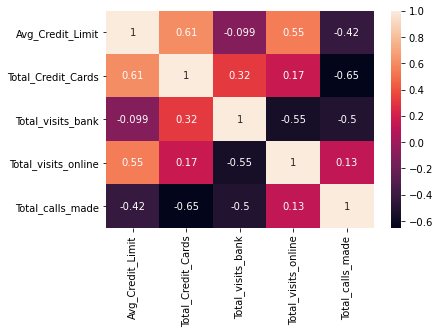

In [11]:
# Visualize the correlation between different attributes
corr = dfScaled.corr()
sns.heatmap(corr, annot = True)

### Insight: 
- There is a negative correlation between the total_visits_bank and total_visits_online, -0.55
- There is a negative correlation between the total_calls_made and the total_visits_bank, -0.5
- There is a positive correlation between the avg_credit_limit and total_credit_cards, 0.61
- There is a positive correlation between the avg_credit_limit and total_visits_online , 0.55
- There is a negative correlation between the total_Credit_cards and the total_calls_made, -0.65

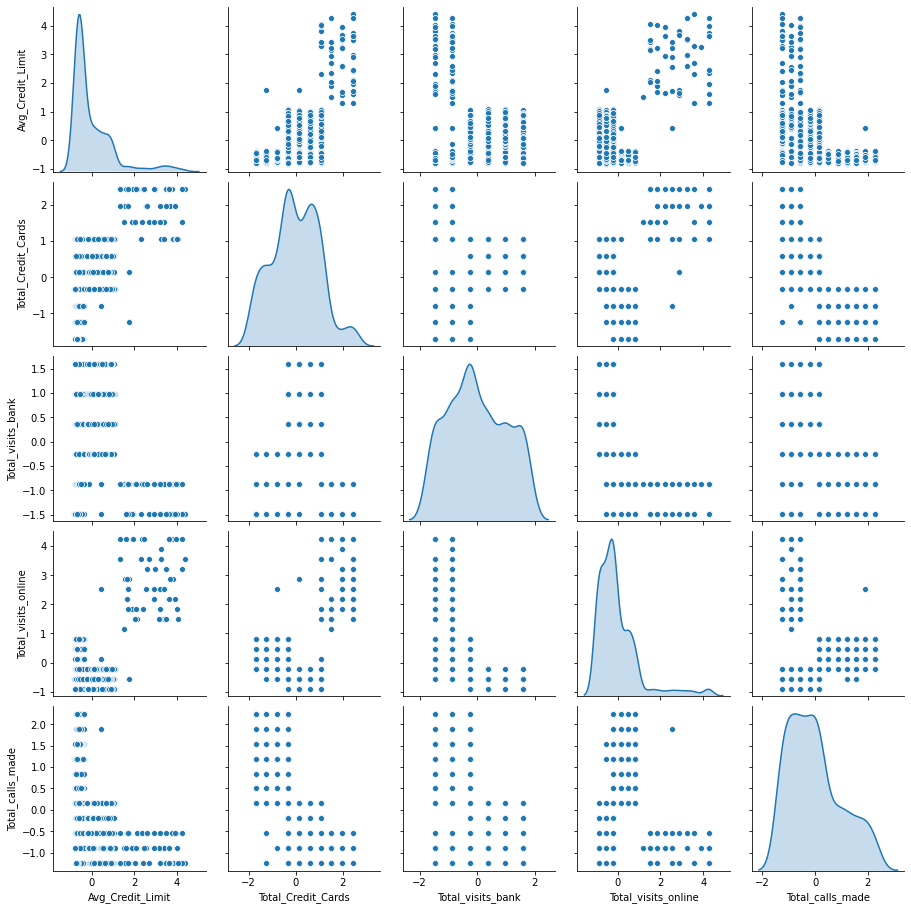

In [12]:
# Visualize the correlations and potential number of clusters using the pair plot
sns.pairplot(dfScaled,diag_kind='kde')

### Insight: 
- There are 3-4 peaks in the diagonal and scatter plots, implying maybe there maybe three or four groups.

## Deliverable – 3 (K-means Clustering)

- Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

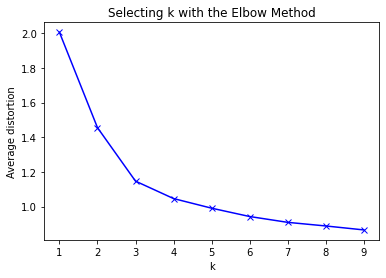

In [13]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Insight: 
- From the plot, it seems there are 3 or 4 groups.

###  Try with K = 3

In [14]:
# Let us first start with K = 3
final_model3=KMeans(3, random_state=12345)
final_model3.fit(dfScaled)
prediction3=final_model3.predict(dfScaled)

#Append the prediction 
df_KMeans_3 = df1.copy()
df_KMeans_3_Scaled = dfScaled.copy()
df_KMeans_3["GROUP"] = prediction3
df_KMeans_3_Scaled["GROUP"] = prediction3
print("Groups Assigned : \n")
df_KMeans_3

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
5,6,58634,20000,3,0,1,8,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,0
656,657,60732,84000,10,1,13,2,0
657,658,53834,145000,8,1,9,1,0
658,659,80655,172000,10,1,15,0,0


In [15]:
# Check the number of data in each cluster

labels = final_model3.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 49 222 384]


In [16]:
# Apply box plots to visualize the results for k = 3
dfClust3 = df_KMeans_3.groupby(['GROUP'])
dfClust3.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,623.653061,56897.979592,141877.551020,8.795918,0.612245,10.877551,1.040816
1,118.225225,55128.536036,12180.180180,2.405405,0.936937,3.567568,6.851351
2,417.609375,54782.703125,33809.895833,5.523438,3.481771,0.986979,2.005208


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E74A5DCA90>,
      dtype=object)

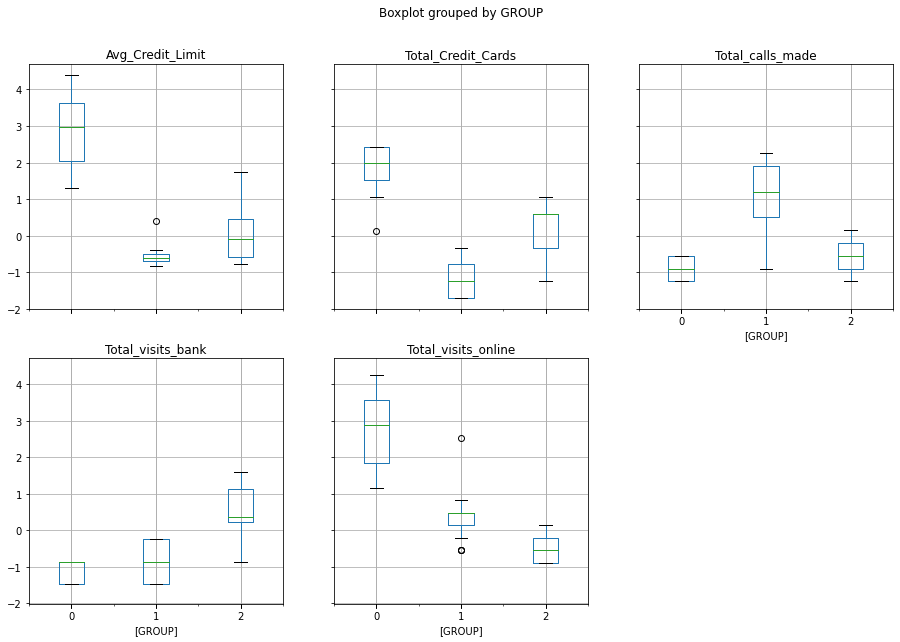

In [17]:
df_KMeans_3_Scaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

### Insights:
- Group 0: is characterised by high Avg_Credit_Limit, more Total_Credit_Cards, low total_calls_made, low total_visits_bank, high total_visits_online
- Group 1:  is characterised by low Avg_Credit_Limit, less Total_Credit_Cards, more total_calls_made, moderate total_visits_bank, moderate total_visits_online
- Group 2:  is characterised by moderate Avg_Credit_Limit, moderate Total_Credit_Cards, moderate total_calls_made, high total_visits_bank, low total_visits_online

###  Try with K = 4

In [18]:
# Next we try K = 4
final_model4=KMeans(4, random_state=12345)
final_model4.fit(dfScaled)
prediction4=final_model4.predict(dfScaled)

#Append the prediction 
df_KMeans_4 = df1.copy()
df_KMeans_4_Scaled = dfScaled.copy()
df_KMeans_4["GROUP"] = prediction4
df_KMeans_4_Scaled["GROUP"] = prediction4
print("Groups Assigned : \n")
df_KMeans_4

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
5,6,58634,20000,3,0,1,8,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,3
656,657,60732,84000,10,1,13,2,3
657,658,53834,145000,8,1,9,1,3
658,659,80655,172000,10,1,15,0,3


In [19]:
# Check the number of data in each cluster

labels = final_model4.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[199 219 188  49]


In [20]:
# Apply box plots to visualize the results for k = 3
dfClust4 = df_KMeans_4.groupby(['GROUP'])
dfClust4.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,415.135678,54071.849246,35904.522613,5.522613,2.477387,0.969849,2.075377
1,118.178082,55144.474886,12173.515982,2.388128,0.931507,3.589041,6.904110
2,415.505319,55522.101064,31255.319149,5.494681,4.510638,1.021277,1.946809
3,623.653061,56897.979592,141877.551020,8.795918,0.612245,10.877551,1.040816


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E74BC1F250>,
      dtype=object)

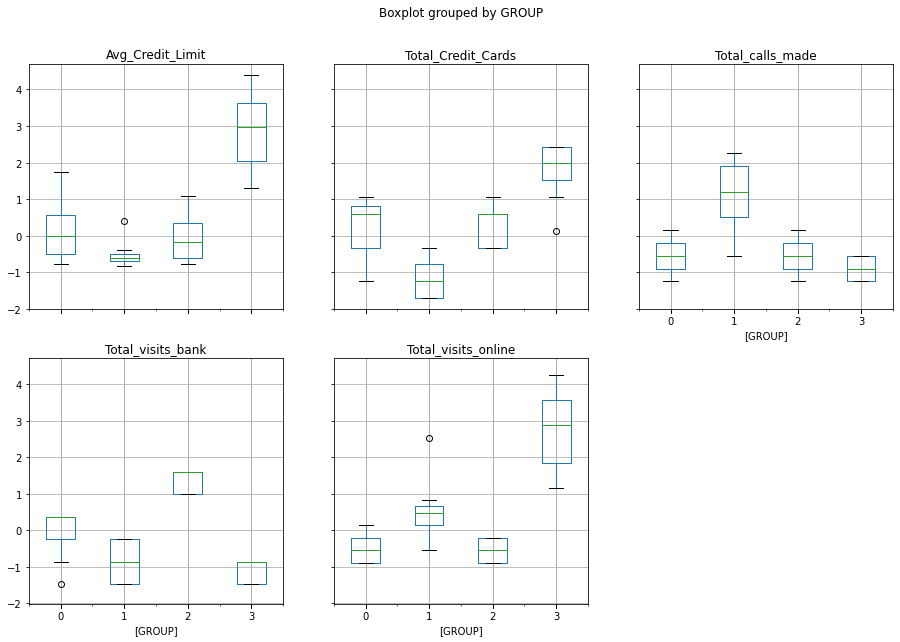

In [21]:
df_KMeans_4_Scaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

### Insights:
- Group 0: is characterised by moderate Avg_Credit_Limit, moderate Total_Credit_Cards, moderate total_calls_made, moderate total_visits_bank, relative low total_visits_online
- Group 1:  is characterised by low Avg_Credit_Limit, least Total_Credit_Cards, highest total_calls_made, moderate total_visits_bank, moderate total_visits_online
- Group 2:  is characterised by moderate Avg_Credit_Limit, moderate Total_Credit_Cards, moderate total_calls_made, highest total_visits_bank, low total_visits_online
- Group 3:  is characterised by high Avg_Credit_Limit, most Total_Credit_Cards, few total_calls_made, few total_visits_bank, more total_visits_online

###  Insights:
- When comparing the results from K=3 and K=4, K=3 is more reasonable. For k=4 case, the characterstics of Group 0 and Group 2 are quite similiar, except for the number of total bank visits.

## Deliverable – 4 (Hierarchical Clustering)

- Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

### Try Ward linkage method

In [22]:
#Use ward as linkage metric and distance as Eucledia
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
Z = linkage(dfScaled, 'ward', metric='euclidean')
Z.shape

(654, 4)

In [23]:
Z[:]

array([[ 459.        ,  492.        ,    0.        ,    2.        ],
       [ 420.        ,  450.        ,    0.        ,    2.        ],
       [ 247.        ,  358.        ,    0.        ,    2.        ],
       ...,
       [1303.        , 1304.        ,   16.52368321,  383.        ],
       [1301.        , 1306.        ,   46.83864166,  432.        ],
       [1305.        , 1307.        ,   50.01124076,  655.        ]])

In [24]:
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.7399284005362226

### Insights: 
- The cophenetic coefficent is a measure of degree of fit of a classification to a set of data and as a criterion for evaluating the efficiency of various clustering techniques

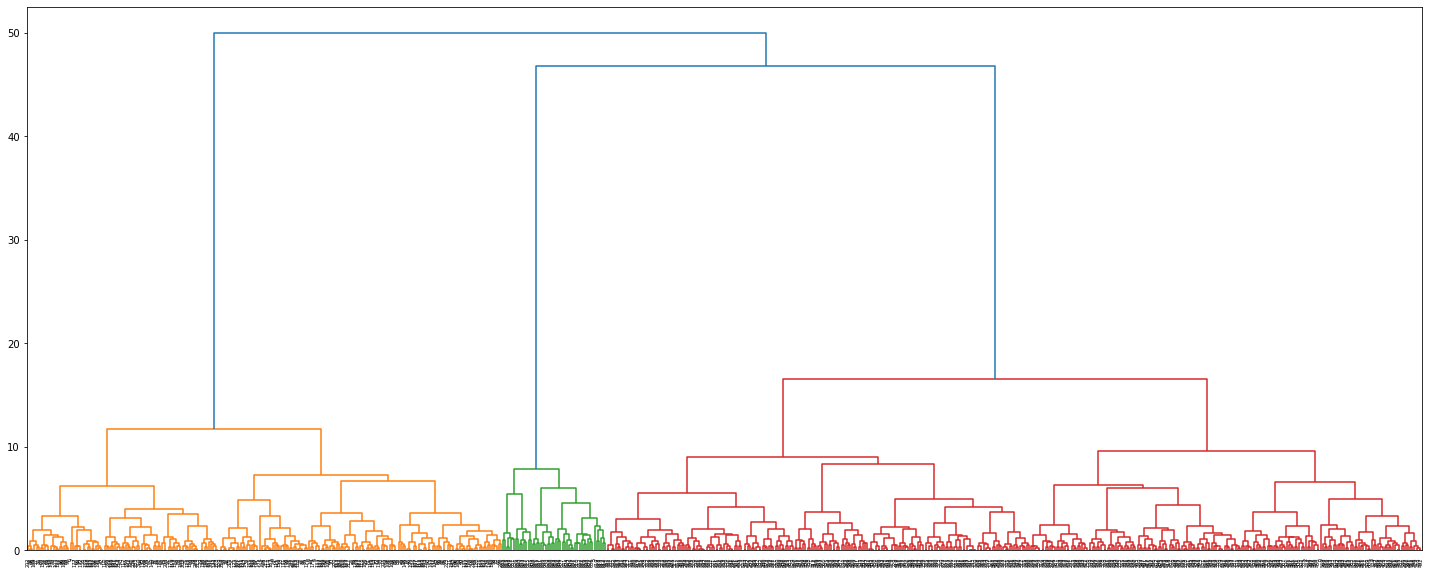

In [25]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

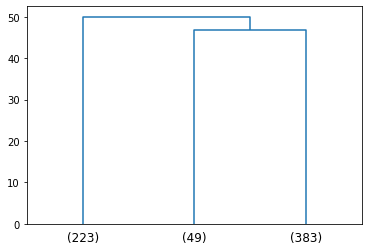

In [26]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [27]:
max_d = 45

In [28]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [29]:
#Append the prediction 
df_hierarchical = df1.copy()
df_hierarchical_Scaled = dfScaled.copy()
df_hierarchical["GROUP"] = clusters
df_hierarchical_Scaled["GROUP"] = clusters
print("Groups Assigned : \n")
df_hierarchical

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,3
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,3
3,4,40496,30000,5,1,1,4,3
5,6,58634,20000,3,0,1,8,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,2
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


In [30]:
# Apply box plots to visualize the results for k = 3
dfClusth = df_hierarchical.groupby(['GROUP'])
dfClusth.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
1,118.991031,55102.538117,12156.950673,2.417040,0.941704,3.560538,6.838565
2,623.653061,56897.979592,141877.551020,8.795918,0.612245,10.877551,1.040816
3,417.945170,54796.937337,33879.895561,5.524804,3.485640,0.984334,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E74C1F6A00>,
      dtype=object)

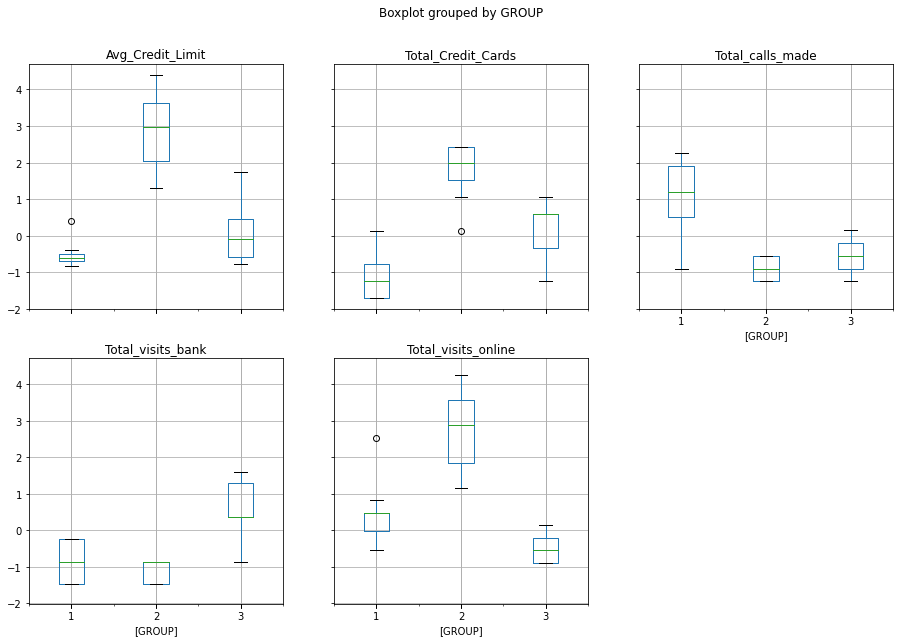

In [31]:
df_hierarchical_Scaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

### Insights: The clusters are similiar to the ones from k-means
- Group 2: is characterised by high Avg_Credit_Limit, more Total_Credit_Cards, low total_calls_made, low total_visits_bank, high total_visits_online
- Group 1:  is characterised by low Avg_Credit_Limit, less Total_Credit_Cards, more total_calls_made, moderate total_visits_bank, moderate total_visits_online
- Group 3:  is characterised by moderate Avg_Credit_Limit, moderate Total_Credit_Cards, moderate total_calls_made, high total_visits_bank, low total_visits_online

### Try Complete linkage method

In [32]:
#Use complete as linkage metric and distance as Eucledia
#### generate the linkage matrix
Z_complete = linkage(dfScaled, 'complete', metric='euclidean')
Z_complete.shape

(654, 4)

In [33]:
Z_complete[:]

array([[ 459.        ,  492.        ,    0.        ,    2.        ],
       [ 317.        ,  375.        ,    0.        ,    2.        ],
       [ 254.        ,  292.        ,    0.        ,    2.        ],
       ...,
       [1302.        , 1304.        ,    4.67092652,  223.        ],
       [1303.        , 1306.        ,    5.97929228,  606.        ],
       [1305.        , 1307.        ,    8.45676885,  655.        ]])

In [34]:
c_complete, coph_dists_complete = cophenet(Z_complete , pdist(dfScaled))
c_complete

0.8667328091184989

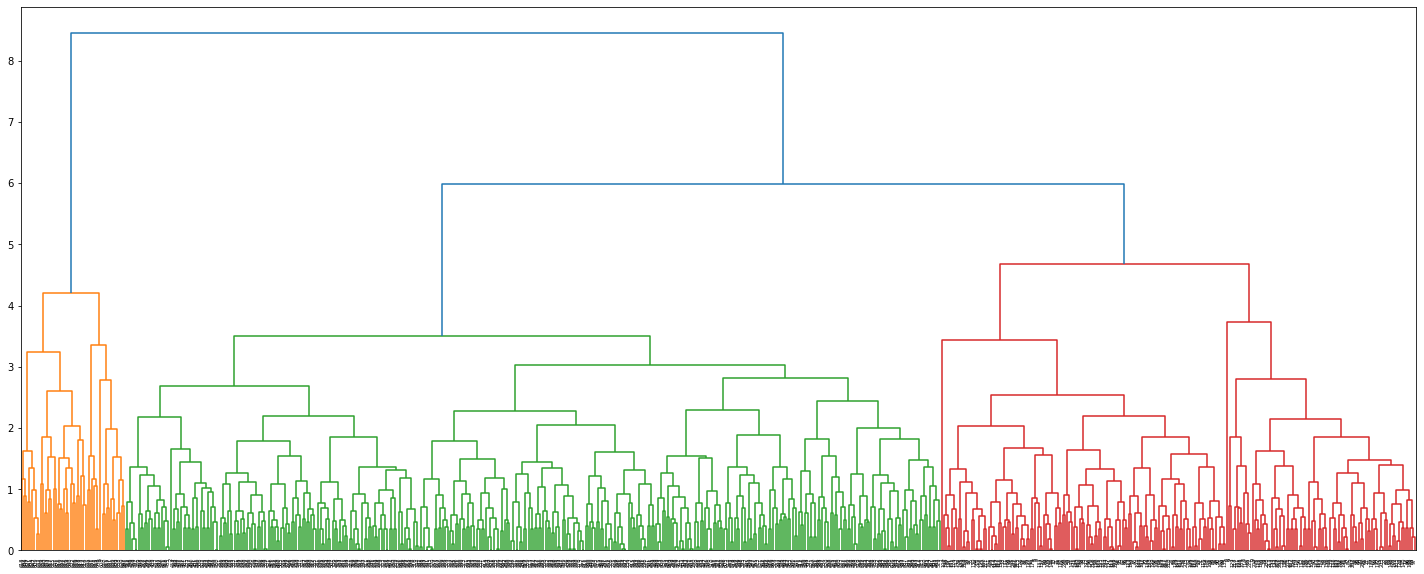

In [35]:
plt.figure(figsize=(25, 10))
dendrogram(Z_complete)
plt.show()

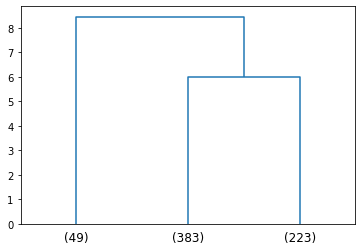

In [36]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### Insight: 
- Comparing ward and complete linkage, there is no significant difference when clustering into three groups

### Try Average linkage method

In [37]:
#Use Average as linkage metric and distance as Eucledia
#### generate the linkage matrix
Z_average = linkage(dfScaled, 'average', metric='euclidean')
c_average, coph_dists_average = cophenet(Z_average , pdist(dfScaled))
c_average

0.8978313900952013

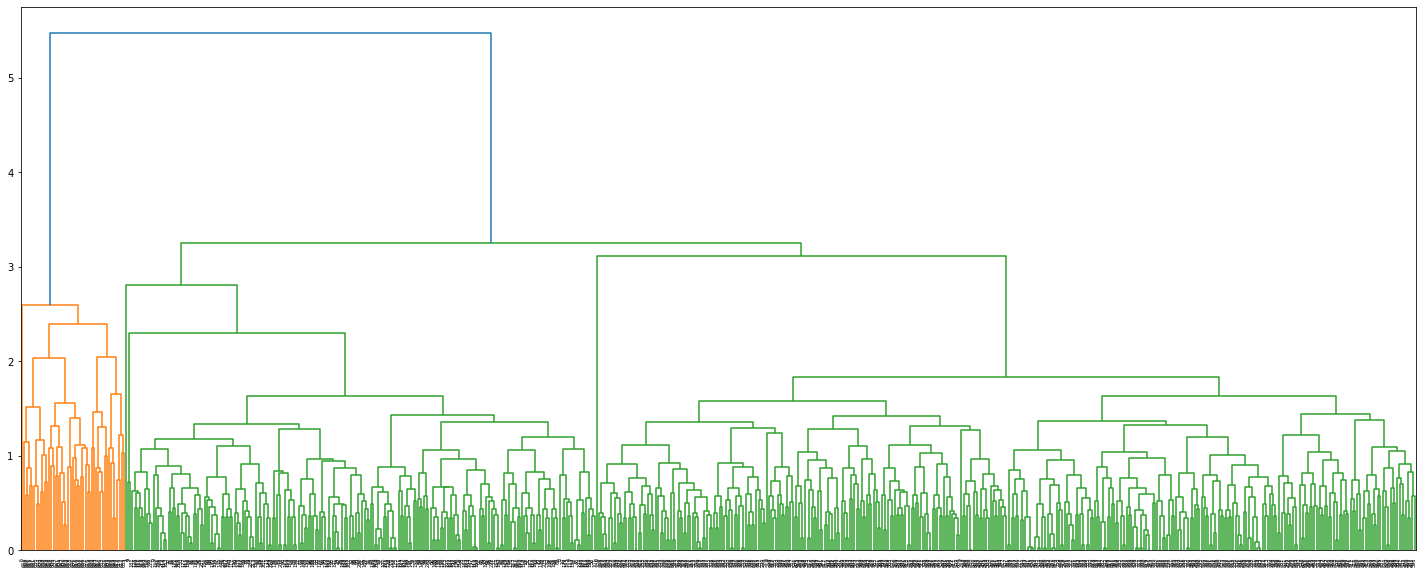

In [38]:
plt.figure(figsize=(25, 10))
dendrogram(Z_average)
plt.show()

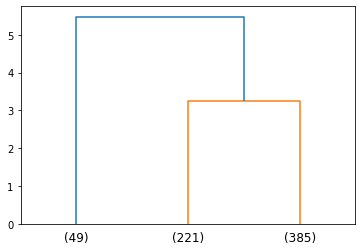

In [39]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### Insight: 
- Comparing ward, complete and average linkage methods, there is no significant difference when clustering into three groups

### Try Single linkage method

In [40]:
#Use single as linkage metric and distance as Eucledia
#### generate the linkage matrix
Z_single = linkage(dfScaled, 'single', metric='euclidean')
c_single, coph_dists_single = cophenet(Z_single , pdist(dfScaled))
c_single

0.7394304750525083

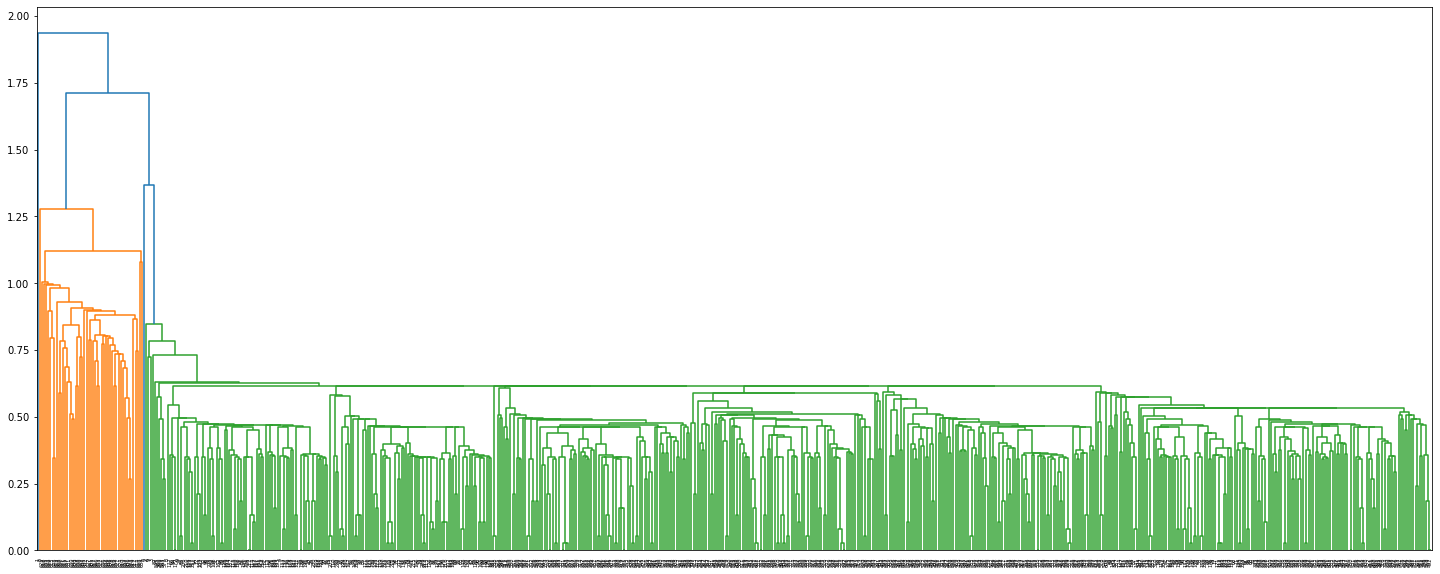

In [41]:
plt.figure(figsize=(25, 10))
dendrogram(Z_single)
plt.show()

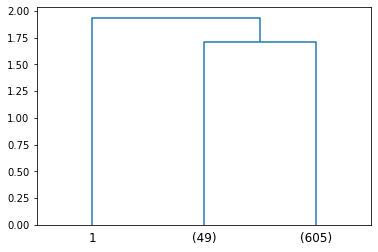

In [42]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### Insight: 
- For single linkage, it distinguish outliers as a separate group. Single linkage method is not very effective.

## Deliverable – 5 (silhouette score)

- Calculate average silhouette score for both methods. (5 marks)

In [43]:
# Calculate Avg Silhoutte Score for k-means clustering k=3
from sklearn.metrics import silhouette_score
silhouette_score(dfScaled,prediction3)

0.5156757893111308

In [44]:
# Calculate Avg Silhoutte Score for k-means clustering k=4
silhouette_score(dfScaled,prediction4)

0.35543523967554014

In [45]:
# Calculate Avg Silhoutte Score for hierarchical clustering with ward linkage, k =3
silhouette_score(dfScaled,clusters)

0.5147121350173276

### Insight: 
- When k = 4, the score is low. This observation also indicated that the optimial is 3 clusters.

## Deliverable – 6 (Comparison between k-means and hierarchical clustering)

- Compare K-means clusters with Hierarchical clusters. (5 marks)

### Insights: 
This comparison is made between k-means and hierarchical clustering for k=3
- Similiar number of observations in each cluster were found for k-means and hierarchial clustering, For k-means, we have (49, 222, 384); For hierarchical clustering with wand linkage, we have (49, 223, 383)
- As shown above, the mean values calculated for clusters as well as the box plots are also very similiar
- Compare to k-means, hierarchical clustering is computational expensive

### Since the clusters are similar using both methods, below I selected one method for visualizing the results

In [46]:
df_hierarchical.iloc[:,2]

0      100000
1       50000
2       50000
3       30000
5       20000
        ...  
655     99000
656     84000
657    145000
658    172000
659    167000
Name: Avg_Credit_Limit, Length: 655, dtype: int64

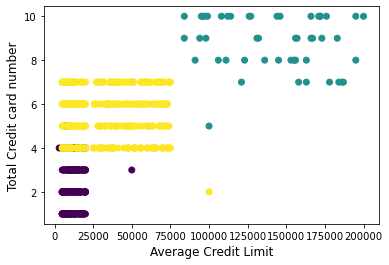

In [47]:
plt.scatter(df_hierarchical.iloc[:,2], df_hierarchical.iloc[:,3], c=clusters)  # plot points with cluster dependent colors
plt.xlabel( "Average Credit Limit" , size = 12 ) 
plt.ylabel( "Total Credit card number" , size = 12 ) 
plt.show()

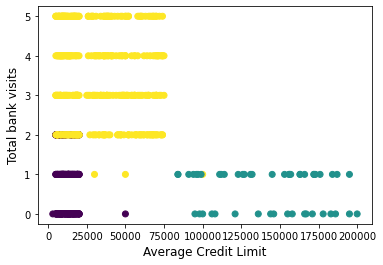

In [48]:
plt.scatter(df_hierarchical.iloc[:,2], df_hierarchical.iloc[:,4], c=clusters)  # plot points with cluster dependent colors
plt.xlabel( "Average Credit Limit" , size = 12 ) 
plt.ylabel( "Total bank visits" , size = 12 ) 
plt.show()

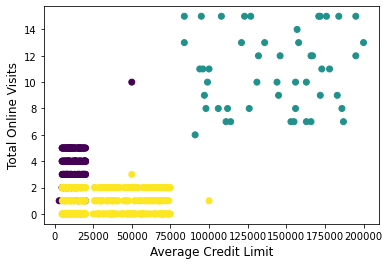

In [49]:
plt.scatter(df_hierarchical.iloc[:,2], df_hierarchical.iloc[:,5], c=clusters)  # plot points with cluster dependent colors
plt.xlabel( "Average Credit Limit" , size = 12 ) 
plt.ylabel( "Total Online Visits" , size = 12 ) 
plt.show()

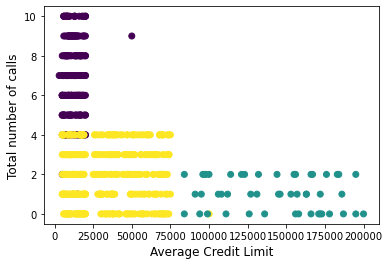

In [50]:
plt.scatter(df_hierarchical.iloc[:,2], df_hierarchical.iloc[:,6], c=clusters)  # plot points with cluster dependent colors
plt.xlabel( "Average Credit Limit" , size = 12 ) 
plt.ylabel( "Total number of calls" , size = 12 ) 
plt.show()

## Deliverable – 7 (Analysis of the clusters)

- Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

### Insights: 
The following insights are obtained based on the k-means clustering. 

##### 1. How many different segments of customers are there?
There are three different segments of customers.

##### 2. How are these segments different from each other?
- Group 0: (49 customers) is characterised by high Avg_Credit_Limit, more Total_Credit_Cards, low total_calls_made, low total_visits_bank, high total_visits_online
- Group 1: (222 customers) is characterised by low Avg_Credit_Limit, less Total_Credit_Cards, more total_calls_made, moderate total_visits_bank, moderate total_visits_online
- Group 2: (384 customers) is characterised by moderate Avg_Credit_Limit, moderate Total_Credit_Cards, moderate total_calls_made, high total_visits_bank, low total_visits_online

##### 3. What are your recommendations to the bank on how to better market to and service these customers?
- Group 0: (49 customers) This group of customers have high market potential for sales. Resolve custermor inquiries through online support. 
- Group 1: (222 customers) This group of customers have low market potential for sales. Resolve custermor inquiries through cusomter service calls and online support. 
- Group 2: (384 customers) This group of customers have moderate market potential for sales. Resolve custermor inquiries through in person visits and cusomter service calls. 